# AdaBoost

In [1]:
import os
os.chdir('C:\Users\Lundi\Documents\Programming\Python\Kaggle\Titanic - 2015')

%matplotlib inline
import pandas as pd
import numpy as np

import sklearn.preprocessing as skl_pre
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import TitanicPreprocessor as tp
import TitanicPredictor as tpred

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sns

X, y, X_real_test, X_test_ids = tp.getData()

10-Fold cross validation scores for DT stump:  [ 0.81111111  0.78888889  0.7752809   0.84269663  0.79775281  0.7752809
  0.76404494  0.74157303  0.80898876  0.76136364]
Average Accuracy:  0.786698161389


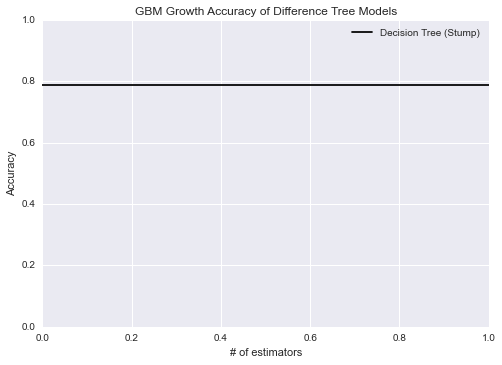

In [2]:
dt_stump_clf = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=1)

print '10-Fold cross validation scores for DT stump: ', cross_val_score(dt_stump_clf, X, y, cv=10)

accuracy_dt_stump = np.mean(cross_val_score(dt_stump_clf, X, y, cv=10))

print 'Average Accuracy: ', accuracy_dt_stump

#Plot
plt.axhline(accuracy_dt_stump, color='black')
ax = plt.gca()
ax.set_ylim([0,1])
ax.legend(['Decision Tree (Stump)'])
ax.set_xlabel('# of estimators')
ax.set_ylabel('Accuracy')
ax.set_title('GBM Growth Accuracy of Difference Tree Models')

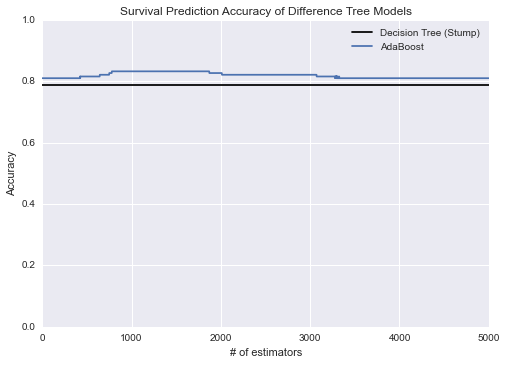

In [3]:
from sklearn.metrics import zero_one_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

ada_dt_stump_clf = AdaBoostClassifier(
    base_estimator=dt_stump_clf,
    learning_rate=0.01,
    n_estimators=5000)
ada_dt_stump_clf.fit(X_train, y_train)

ada_dt_stump_staged_accuracies = []
for index, y_pred in enumerate(ada_dt_stump_clf.staged_predict(X_test)):
    current_accuracy = np.mean(y_pred == y_test)
    ada_dt_stump_staged_accuracies.append([index, current_accuracy])
    ada_dt_stump_clf

ada_dt_stump_staged_accuracies = pd.DataFrame(ada_dt_stump_staged_accuracies, columns=['Stage', 'Accuracy'])
#Plot
plt.axhline(accuracy_dt_stump, color='black')
plt.plot(ada_dt_stump_staged_accuracies['Stage'], ada_dt_stump_staged_accuracies['Accuracy'])
ax = plt.gca()
ax.set_ylim([0,1])
ax.legend(['Decision Tree (Stump)', 'AdaBoost'])
ax.set_xlabel('# of estimators')
ax.set_ylabel('Accuracy')
ax.set_title('Survival Prediction Accuracy of Difference Tree Models')    

In [4]:
ada_dt_stump_staged_accuracies.ix[ada_dt_stump_staged_accuracies['Accuracy'].idxmax(),:]

Stage       778.000000
Accuracy      0.832402
Name: 778, dtype: float64

## Larger DTs

In [5]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
dt_clf.fit(X_train, y_train)

ada_dt_clf = AdaBoostClassifier(
    base_estimator=dt_clf,
    learning_rate=0.001,
    n_estimators=10000)
ada_dt_clf.fit(X_train, y_train)

ada_dt_staged_accuracies = []
for index, y_pred in enumerate(ada_dt_clf.staged_predict(X_test)):
    current_accuracy = np.mean(y_pred == y_test)
    ada_dt_staged_accuracies.append([index, current_accuracy])

ada_dt_staged_accuracies = pd.DataFrame(ada_dt_staged_accuracies, columns=['Stage', 'Accuracy'])

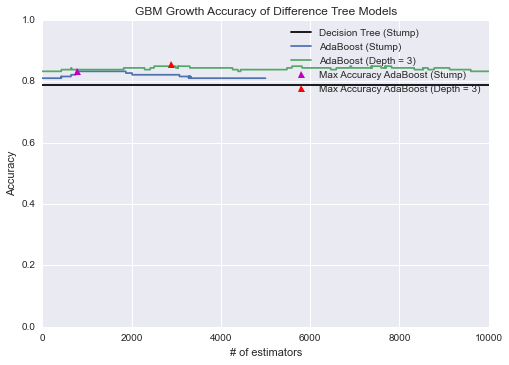

In [6]:
#Plot
plt.axhline(accuracy_dt_stump, color='black')
plt.plot(ada_dt_stump_staged_accuracies['Stage'], ada_dt_stump_staged_accuracies['Accuracy'])
plt.plot(ada_dt_staged_accuracies['Stage'], ada_dt_staged_accuracies['Accuracy'])

plt.plot(ada_dt_stump_staged_accuracies['Accuracy'].idxmax(), ada_dt_stump_staged_accuracies['Accuracy'].max(), marker='^', c='m', linestyle='None')
plt.plot(ada_dt_staged_accuracies['Accuracy'].idxmax(), ada_dt_staged_accuracies['Accuracy'].max(), marker='^', c='r', linestyle='None')
ax = plt.gca()
ax.set_ylim([0,1])
ax.legend(['Decision Tree (Stump)', 'AdaBoost (Stump)','AdaBoost (Depth = 3)','Max Accuracy AdaBoost (Stump)','Max Accuracy AdaBoost (Depth = 3)'])
ax.set_xlabel('# of estimators')
ax.set_ylabel('Accuracy')
ax.set_title('GBM Growth Accuracy of Difference Tree Models')    

In [7]:
ada_dt_staged_accuracies.ix[ada_dt_staged_accuracies['Accuracy'].idxmax(),:]

Stage       2874.000000
Accuracy       0.854749
Name: 2874, dtype: float64

## Test Prediction

In [9]:
ada_dt_stump_clf = AdaBoostClassifier(
    base_estimator=dt_stump_clf,
    learning_rate=0.01,
    n_estimators=2883
)

ada_dt_stump_clf.fit(X, y)

tpred.predictAndExport(ada_dt_stump_clf, X_real_test, X_test_ids)

No improvement

In [10]:
ada_dt_clf = AdaBoostClassifier(
    base_estimator=dt_clf,
    learning_rate=0.001,
    n_estimators=2874
)

ada_dt_clf.fit(X, y)

tpred.predictAndExport(ada_dt_clf, X_real_test, X_test_ids)

Test Accuracy: 0.79426 (Rank 1414)

## Optimizing larger DTs

Stage       1686.000000
Accuracy       0.854749
Name: 1686, dtype: float64

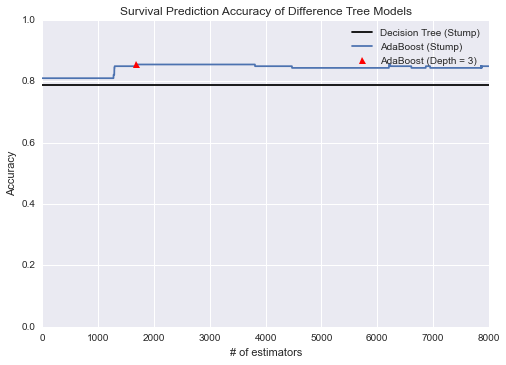

In [15]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1)
dt_clf.fit(X_train, y_train)

ada_dt_clf = AdaBoostClassifier(
    base_estimator=dt_clf,
    learning_rate=0.001,
    n_estimators=8000)
ada_dt_clf.fit(X_train, y_train)

ada_dt_staged_accuracies = []
for index, y_pred in enumerate(ada_dt_clf.staged_predict(X_test)):
    current_accuracy = np.mean(y_pred == y_test)
    ada_dt_staged_accuracies.append([index, current_accuracy])

ada_dt_staged_accuracies = pd.DataFrame(ada_dt_staged_accuracies, columns=['Stage', 'Accuracy'])

#Plot
plt.axhline(accuracy_dt_stump, color='black')
plt.plot(ada_dt_staged_accuracies['Stage'], ada_dt_staged_accuracies['Accuracy'])

plt.plot(ada_dt_staged_accuracies['Accuracy'].idxmax(), ada_dt_staged_accuracies['Accuracy'].max(), marker='^', c='r', linestyle='None')
ax = plt.gca()
ax.set_ylim([0,1])
ax.legend(['Decision Tree (Stump)', 'AdaBoost (Stump)','AdaBoost (Depth = 3)','Max Accuracy AdaBoost (Stump)','Max Accuracy AdaBoost (Depth = 3)'])
ax.set_xlabel('# of estimators')
ax.set_ylabel('Accuracy')
ax.set_title('Survival Prediction Accuracy of Difference Tree Models')    

ada_dt_staged_accuracies.ix[ada_dt_staged_accuracies['Accuracy'].idxmax(),:]

In [16]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1)
ada_dt_clf = AdaBoostClassifier(
    base_estimator=dt_clf,
    learning_rate=0.001,
    n_estimators=1686
)
ada_dt_clf.fit(X, y)
tpred.predictAndExport(ada_dt_clf, X_real_test, X_test_ids)